# Сайт Menu TJ

Данные для анализа были спаршены с сайт menu.tj (ИНФОРМАЦИОННЫЙ ПОРТАЛ О РЕСТОРАННОЙ ЖИЗНИ СТОЛИЦЫ)

Задачи:
1) Оценить корелацию данных.
2) Оценить популярность заведения по их кол-ву. Визуализиоровать данные.
3) Оценить популярность заведения по их оценке. Визуализиоровать данные.
4) Оценить где люди предпочитают траить деньги. Визуализиоровать данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
sData=pd.read_excel('MenuTJ.xlsx')

In [3]:
# Пример исходных данных для анализа
sData.head()

,URL,Каталог,Заведение,Тип заведения,Средняя оценка,Ср. счет от TJS,Ср. счет до TJS,ТИП КУХНИ,ОСОБЕНООСТИ,МУЗЫКА,КОЛИЧЕСТВО МЕСТ,КРЕДИТНАЯ КАРТА,WI-FI,ПАРКОВКА,Будни,Воскресенье,Суббота,Индекс
0,https://menu.tj/zavedeniya/sultanbey/,Ресторан,Sultanbey,Турецкий ресторан,4.8,80,90,"Восточная,Турецкая","VIP-кабинка,Wi-Fi,Веранда,Говорят на английско...","Зарубежная,Турецкая",380.0,Да,Есть,Есть,от 07:30 до 23:00,от 07:30 до 23:00,от 07:30 до 23:00,15
1,https://menu.tj/zavedeniya/amani/,Ресторан,Амани,Ресторан,4.5,150,170,Итальянская,"Говорят на английском,Живая музыка,Завтраки,Ка...",Зарубежная,75.0,Есть,Есть,Есть,12:00-23:55,12:00-23:55,12:00-23:55,15
2,https://menu.tj/zavedeniya/zaytun/,Ресторан,Zaytun,Ресторан,0.0,30,90,"BBQ,Азиатская,Домашняя,Европейская","osobennosti,Wi-Fi,Зал для курящих,Кальяны,Корп...","muzyka,Лаундж,Фоновая музыка",90.0,Да,Да,Да,с 10:00 до 22:00,с 10:00 до 22:00,с 10:00 до 22:00,15
3,https://menu.tj/zavedeniya/kafe-sapporo/,Ресторан,Кафе «Sapporo»,"Кафе, Кафе бар, Ресторан, Суши бар",0.0,35,69,"kukhnya,Японская","Cashback,osobennosti,Wi-Fi,Рекомендовано Menu....","muzyka,Зарубежная,Народная музыка",40.0,Нет,Да,Да,с 10:00 до 22:00,с 10:00 до 22:00,с 10:00 до 22:00,15
4,https://menu.tj/zavedeniya/rudaki-restaurant/,Ресторан,Rudaki Restaurant,"Пригостиничный, Ресторан",5.0,100,150,"Европейская,Интернациональная,Итальянская,Наци...","Wi-Fi,Бассейн,Говорят на английском,Детское ме...",Фоновая музыка,120.0,Есть,Есть,Есть,07:00-23:00,07:00-23:00,07:00-23:00,15


In [4]:
sData.columns

Index(['URL', 'Каталог', 'Заведение', 'Тип заведения', 'Средняя оценка',
       'Ср. счет от TJS', 'Ср. счет до TJS', 'ТИП КУХНИ', 'ОСОБЕНООСТИ',
       'МУЗЫКА', 'КОЛИЧЕСТВО МЕСТ', 'КРЕДИТНАЯ КАРТА', 'WI-FI', 'ПАРКОВКА',
       'Будни', 'Воскресенье', 'Суббота', 'Индекс'],
      dtype='object')

In [5]:
mTable=sData.drop(['URL','ПАРКОВКА'], axis=1) # удаляяем лишние поля
mTable.shape # смотрим размерность данных


(445, 16)

In [6]:
#Попытаемся найти корреляцию между 4мя полями
# Поле индекс это цифровое отображение поля Каталог
mTable2=mTable[['Средняя оценка', 'Ср. счет до TJS', 'КОЛИЧЕСТВО МЕСТ','Индекс']]
correlation_matrix = mTable2.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')
# Как можно увидеть наблюдается слабая зависимость данных друг от друга

,Средняя оценка,Ср. счет до TJS,КОЛИЧЕСТВО МЕСТ,Индекс
Средняя оценка,1.000000,0.093271,0.161948,0.018771
Ср. счет до TJS,0.093271,1.000000,-0.087609,0.007077
КОЛИЧЕСТВО МЕСТ,0.161948,-0.087609,1.000000,0.069997
Индекс,0.018771,0.007077,0.069997,1.000000


In [30]:
# группируем по Каталогу и Среднему счету от
mTable[['Каталог','Ср. счет от TJS']].groupby('Каталог').describe()

Ср. счет от TJS                                        \
                                count        mean        std    min     25%   
Каталог                                                                       
Бар                              17.0   51.470588  21.991810   10.0   40.00   
Говорят на английском            50.0   74.620000  53.996179   10.0   31.50   
Доставка                         52.0   44.423077  26.395444   10.0   25.00   
Живая музыка                     26.0   85.384615  49.717664   25.0   50.00   
Зал для курящих                  15.0   70.000000  39.641248   30.0   40.00   
Индийская кухня                   1.0  100.000000        NaN  100.0  100.00   
Итальянская кухня                13.0   50.769231  30.127932   15.0   25.00   
Кальяны                          56.0   71.071429  34.571590   20.0   50.00   
Кафе                             33.0   42.151515  24.551122   10.0   25.00   
Кондитерская                      6.0   26.666667  15.055453   10.0   20.00   
Кофейня                           7.0   31.428571  17.961599   10.0   20.00   
Ресторан                         57.0   78.596491  35.289041   25.0   50.00   
Рестораны для свадьбы             6.0   88.333333  55.287129   50.0   50.00   
Суши бар                          3.0   65.000000  32.787193   35.0   47.50   
Терасса                          35.0   63.714286  37.442954   20.0   30.00   
Чайхана                          11.0   59.090909  26.250541   20.0   40.00   
национальная                     45.0   62.666667  45.845591   10.0   30.00   
пицца                             8.0   40.000000  23.299295   15.0   23.75   
пригостинечные                    4.0   90.000000  45.460606   50.0   57.50   

                                             
                         50%     75%    max  
Каталог                                      
Бар                     50.0   70.00   80.0  
Говорят на английском   62.5  100.00  250.0  
Доставка                30.0   60.00  120.0  
Живая музыка            70.0  115.00  200.0  
Зал для курящих         60.0   90.00  150.0  
Индийская кухня        100.0  100.00  100.0  
Итальянская кухня       50.0   70.00  100.0  
Кальяны                 65.0   85.00  200.0  
Кафе                    36.0   50.00  100.0  
Кондитерская            20.0   35.00   50.0  
Кофейня                 30.0   40.00   60.0  
Ресторан                70.0  100.00  150.0  
Рестораны для свадьбы   65.0  102.50  190.0  
Суши бар                60.0   80.00  100.0  
Терасса                 60.0   90.00  150.0  
Чайхана                 60.0   75.00  110.0  
национальная            50.0   80.00  250.0  
пицца                   32.5   53.75   80.0  
пригостинечные          80.0  112.50  150.0

In [31]:
# Считаем кол-во заведений по Каталогу
mCounts=mTable['Каталог'].value_counts()
mCounts

Каталог
Ресторан                 57
Кальяны                  56
Доставка                 52
Говорят на английском    50
национальная             45
Терасса                  35
Кафе                     33
Живая музыка             26
Бар                      17
Зал для курящих          15
Итальянская кухня        13
Чайхана                  11
пицца                     8
Кофейня                   7
Кондитерская              6
Рестораны для свадьбы     6
пригостинечные            4
Суши бар                  3
Индийская кухня           1
Name: count, dtype: int64

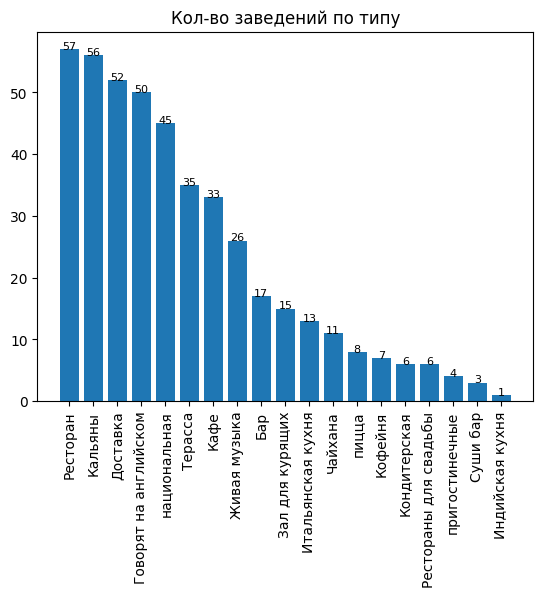

In [32]:
#Визуализируем полученные данные
x=mCounts.reset_index()['Каталог']
y=mCounts.reset_index()['count']
ax=plt.bar(x,y)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center', fontsize=8)
plt.xticks(rotation=90)
plt.title('Кол-во заведений по типу')
plt.show()

In [33]:
# Следуюшиая группировка покажет какая средняя оценка по заведениям
mCounts2=round(mTable[['Каталог','Средняя оценка']].groupby('Каталог').mean().sort_values(['Средняя оценка'],ascending=1),2)
mCounts2

,Средняя оценка
Каталог,
Суши бар,0.00
Чайхана,0.68
Кофейня,0.70
Кафе,0.79
Рестораны для свадьбы,0.80
Кальяны,0.82
Бар,0.82
Зал для курящих,0.90
национальная,0.90


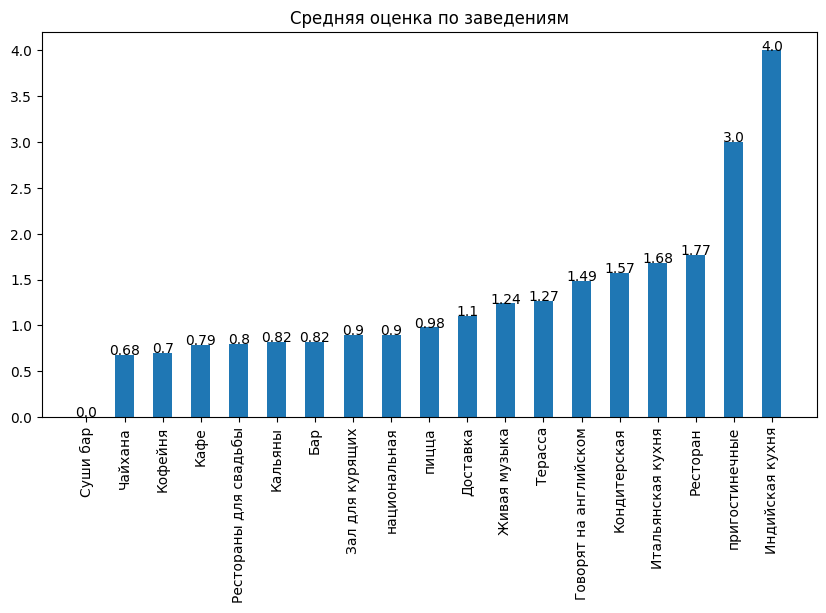

In [35]:
#Визуализируем данные из предыдущего шага
x=mCounts2.reset_index()['Каталог']
y=mCounts2.reset_index()['Средняя оценка']
plt.figure(figsize=(10,5))
plt.bar(x,y, width=0.5)

for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center', fontsize=10)

plt.xticks(rotation=90)
plt.title('Средняя оценка по заведениям')
plt.show()

In [36]:
# Добавим столбец средний чек на основании столбцов 'Ср. счет от TJS','Ср. счет до TJS']
if 'Средний чек' in mTable.columns: mTable.pop('Средний чек')
mTable.insert(6,"Средний чек",mTable[['Ср. счет от TJS','Ср. счет до TJS']].mean(axis=1))
mTable.head()

,Каталог,Заведение,Тип заведения,Средняя оценка,Ср. счет от TJS,Ср. счет до TJS,Средний чек,ТИП КУХНИ,ОСОБЕНООСТИ,МУЗЫКА,КОЛИЧЕСТВО МЕСТ,КРЕДИТНАЯ КАРТА,WI-FI,Будни,Воскресенье,Суббота,Индекс
0,Ресторан,Sultanbey,Турецкий ресторан,4.8,80,90,85.0,"Восточная,Турецкая","VIP-кабинка,Wi-Fi,Веранда,Говорят на английско...","Зарубежная,Турецкая",380.0,Да,Есть,от 07:30 до 23:00,от 07:30 до 23:00,от 07:30 до 23:00,15
1,Ресторан,Амани,Ресторан,4.5,150,170,160.0,Итальянская,"Говорят на английском,Живая музыка,Завтраки,Ка...",Зарубежная,75.0,Есть,Есть,12:00-23:55,12:00-23:55,12:00-23:55,15
2,Ресторан,Zaytun,Ресторан,0.0,30,90,60.0,"BBQ,Азиатская,Домашняя,Европейская","osobennosti,Wi-Fi,Зал для курящих,Кальяны,Корп...","muzyka,Лаундж,Фоновая музыка",90.0,Да,Да,с 10:00 до 22:00,с 10:00 до 22:00,с 10:00 до 22:00,15
3,Ресторан,Кафе «Sapporo»,"Кафе, Кафе бар, Ресторан, Суши бар",0.0,35,69,52.0,"kukhnya,Японская","Cashback,osobennosti,Wi-Fi,Рекомендовано Menu....","muzyka,Зарубежная,Народная музыка",40.0,Нет,Да,с 10:00 до 22:00,с 10:00 до 22:00,с 10:00 до 22:00,15
4,Ресторан,Rudaki Restaurant,"Пригостиничный, Ресторан",5.0,100,150,125.0,"Европейская,Интернациональная,Итальянская,Наци...","Wi-Fi,Бассейн,Говорят на английском,Детское ме...",Фоновая музыка,120.0,Есть,Есть,07:00-23:00,07:00-23:00,07:00-23:00,15


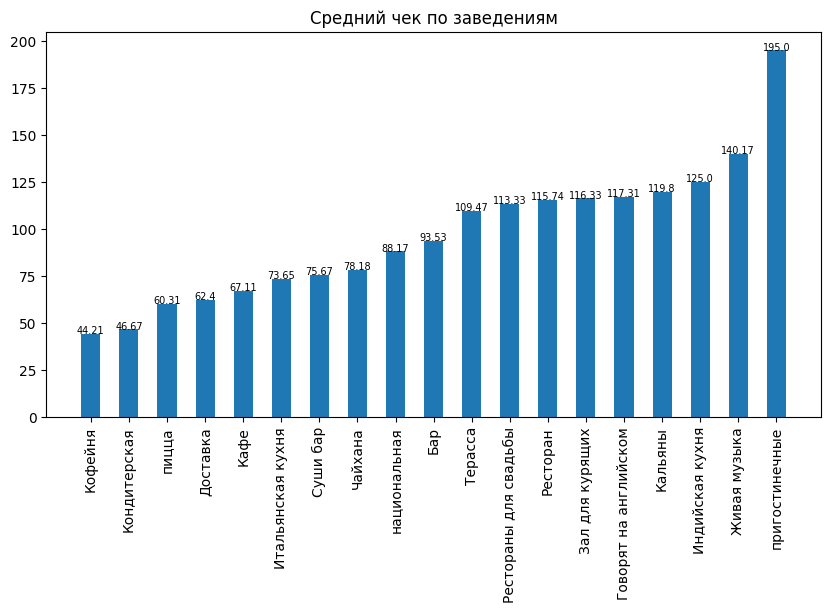

In [ ]:
#Визуализация среднего чека по заведениям
mCounts3=round(mTable[['Каталог','Средний чек']].groupby('Каталог').mean().sort_values(['Средний чек'],ascending=1),2)
x=mCounts3.reset_index()['Каталог']
y=mCounts3.reset_index()['Средний чек']
plt.figure(figsize=(10,5))
plt.bar(x,y, width=0.5)

for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center', fontsize=7)

plt.xticks(rotation=90)
plt.title('Средний чек по заведениям')
plt.show()

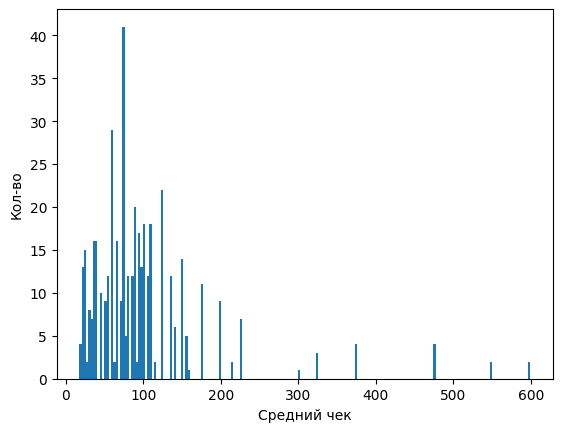

In [38]:
# Какой средний чек чаще всего платят клиенты в заведениях (сколько брать с собой денег)
xx=tuple(mTable['Средний чек'])
plt.hist(xx,200)
plt.xlabel('Средний чек')
plt.ylabel('Кол-во')
plt.show()